# Predicting Employee Attrition - Starter Notebook

This notebook contains starter code to load data, run initial EDA and cleaning, and save a cleaned dataset. All code cells are commented to explain each step.

In [2]:
# Import common libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set project paths
PROJECT_ROOT = Path('..').resolve()  # project root (one level up from notebooks/)
# Agora usamos o link raw do GitHub em vez do caminho local
RAW_FILE = "https://raw.githubusercontent.com/Matheuskcode/edsb/main/data/raw/HR_Attrition_Dataset.csv"

# Keep data/clean folder for outputs
DATA_CLEAN = PROJECT_ROOT / 'data' / 'clean'
DATA_CLEAN.mkdir(parents=True, exist_ok=True)

# Remembered columns
COLUMNS = [
    'Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome',
    'Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
    'Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction',
    'MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime',
    'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours',
    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'
]

# Helper to load the provided CSV file
def load_data_from_provided():
    try:
        print(f'Loading data from {RAW_FILE}')
        return pd.read_csv(RAW_FILE)
    except Exception as e:
        print("Erro ao carregar dataset:", e)
        return None

# Example usage
df = load_data_from_provided()
if df is not None:
    print('Loaded dataframe with shape:', df.shape)
    display(df.head())

Loading data from https://raw.githubusercontent.com/Matheuskcode/edsb/main/data/raw/HR_Attrition_Dataset.csv
Loaded dataframe with shape: (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tgt_vc.index, y=tgt_vc.values, palette="Set2", ax=ax)


C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


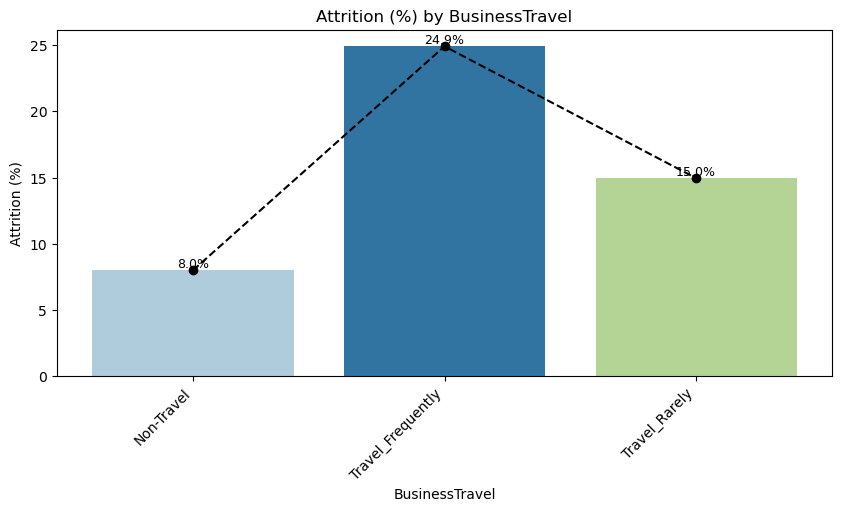

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


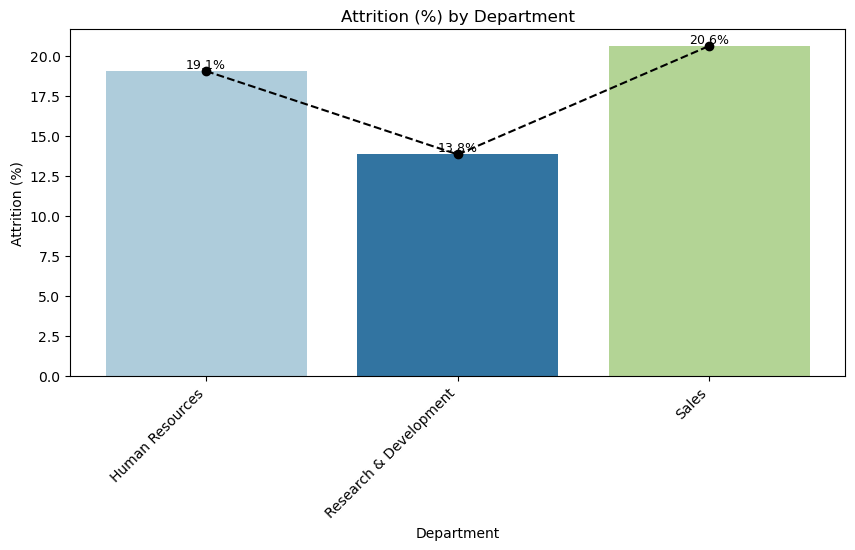

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


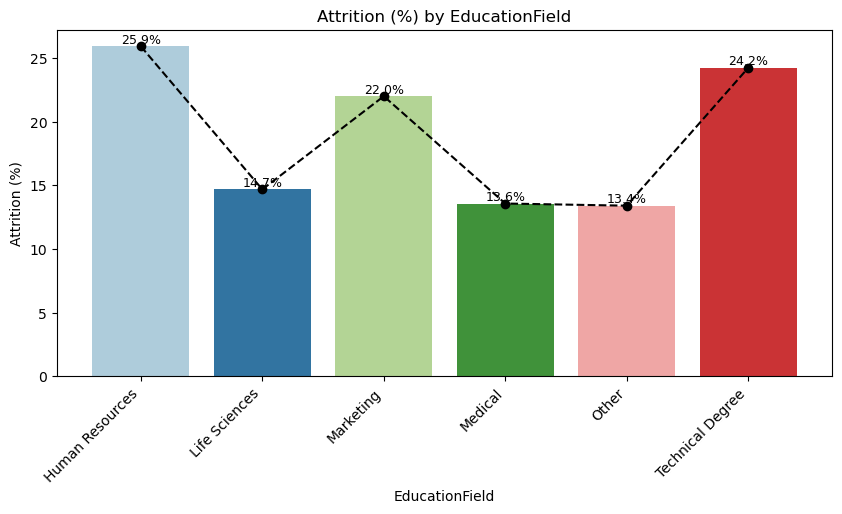

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


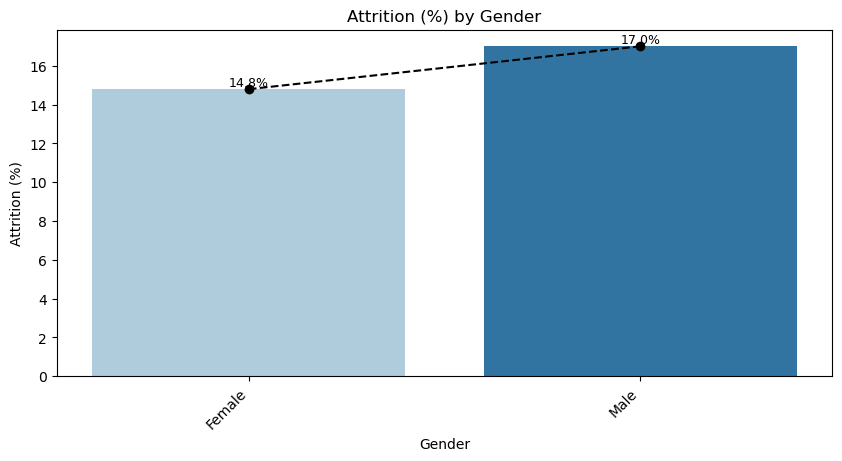

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


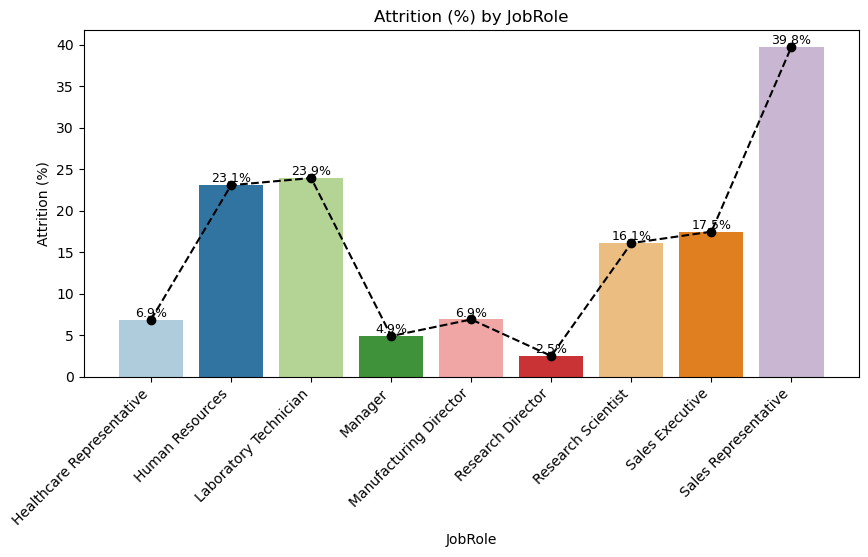

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


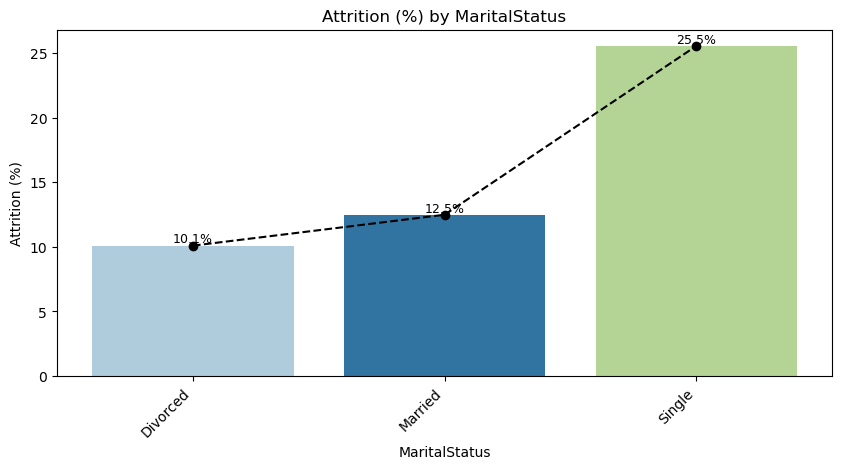

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


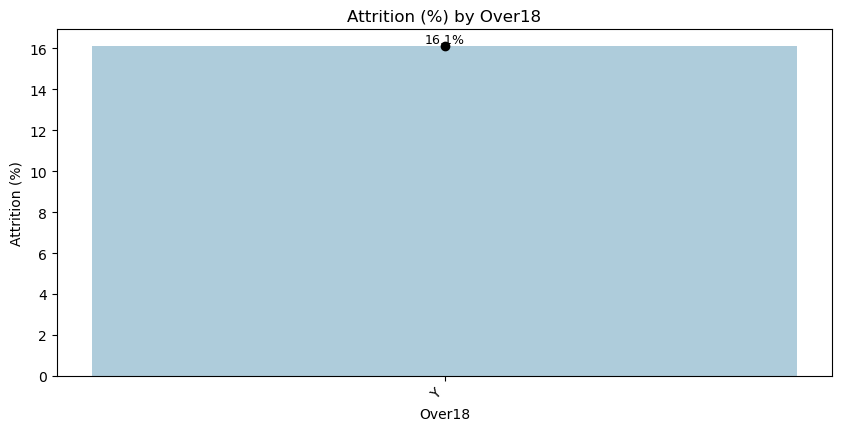

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


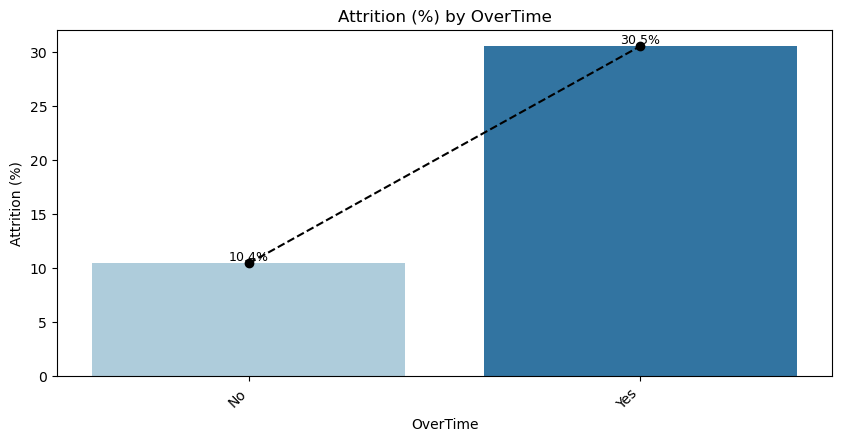

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


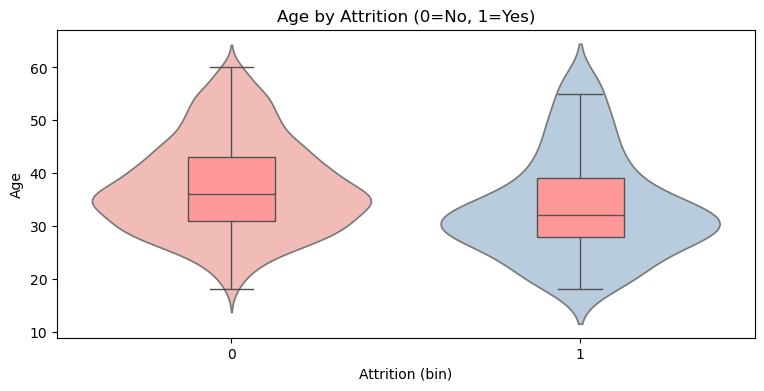

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


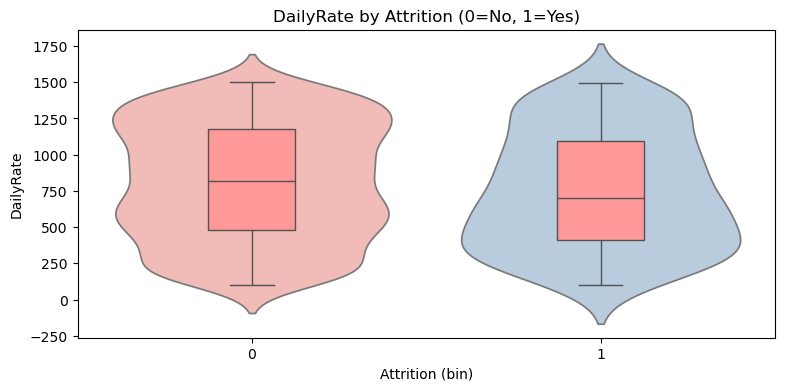

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


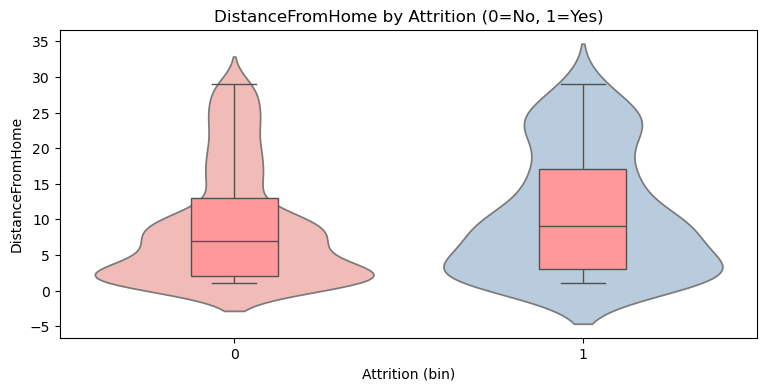

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


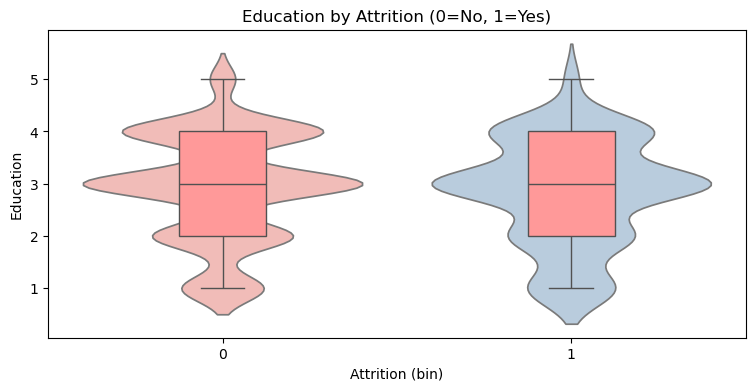

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


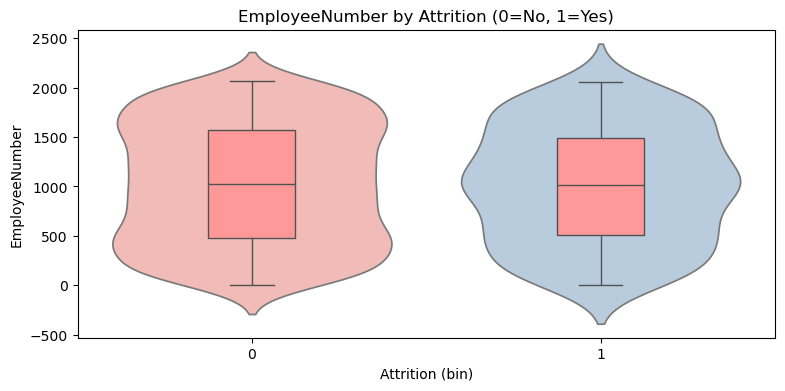

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


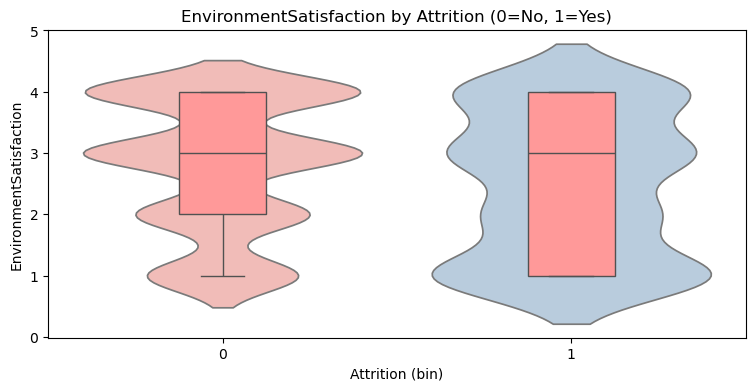

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


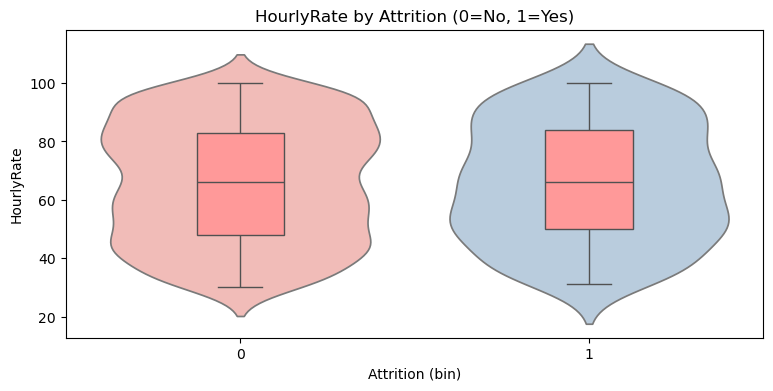

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


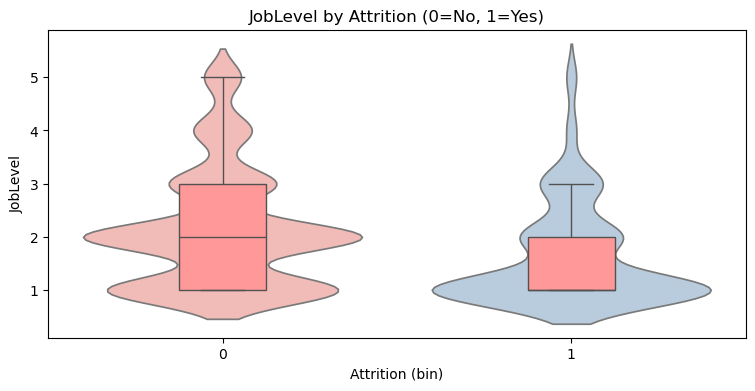

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


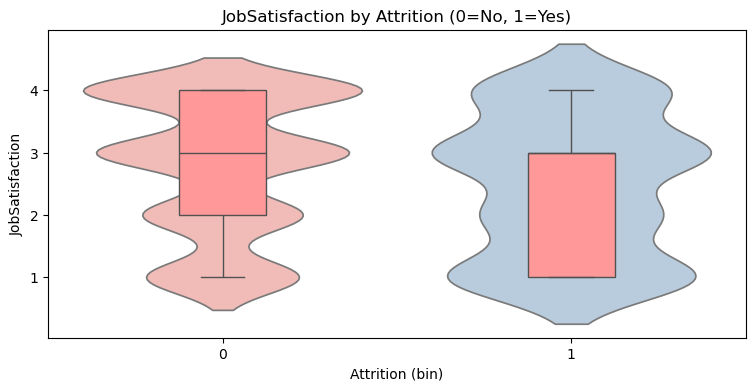

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


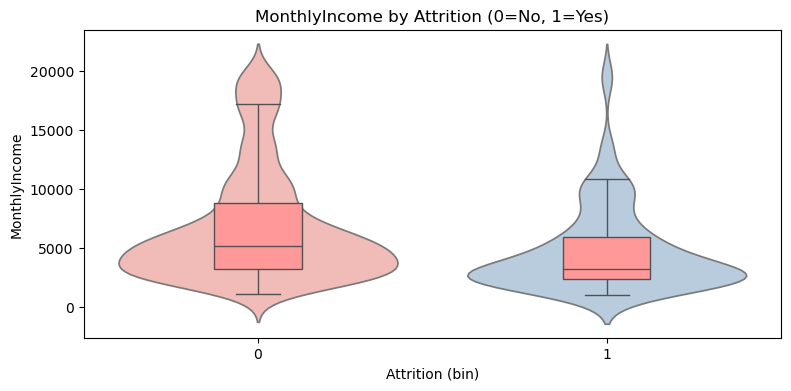

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


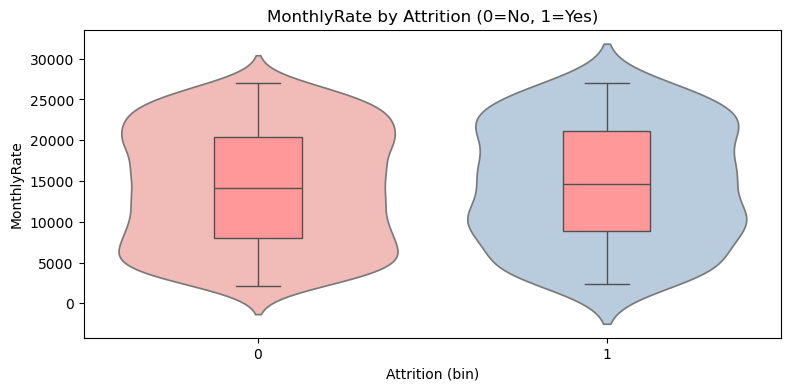

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


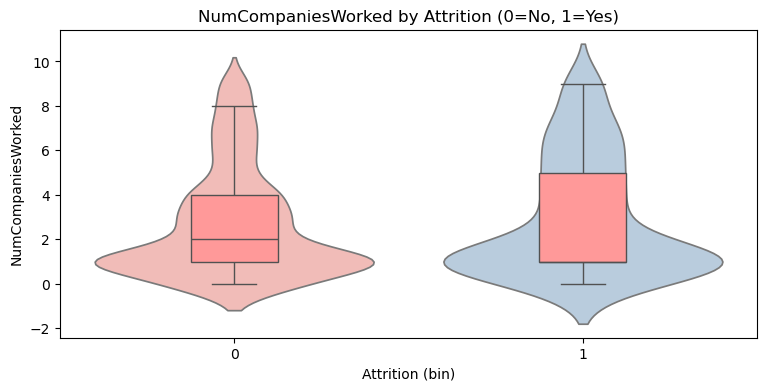

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


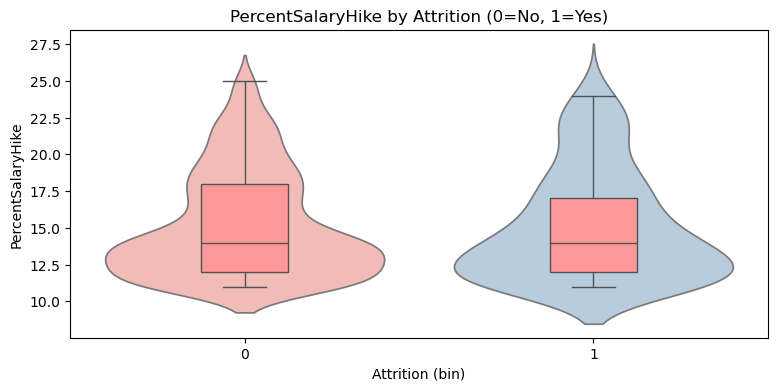

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


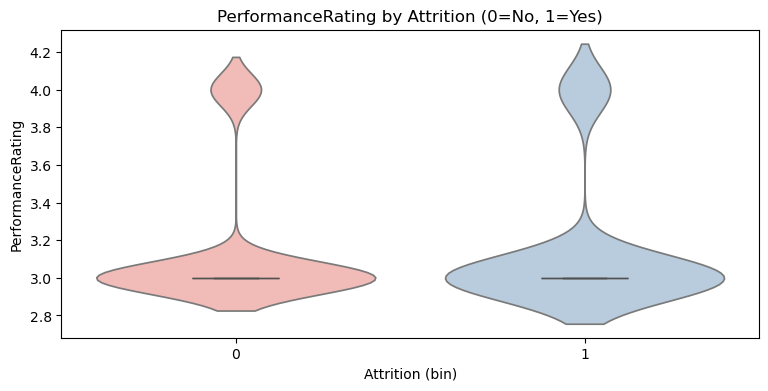

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


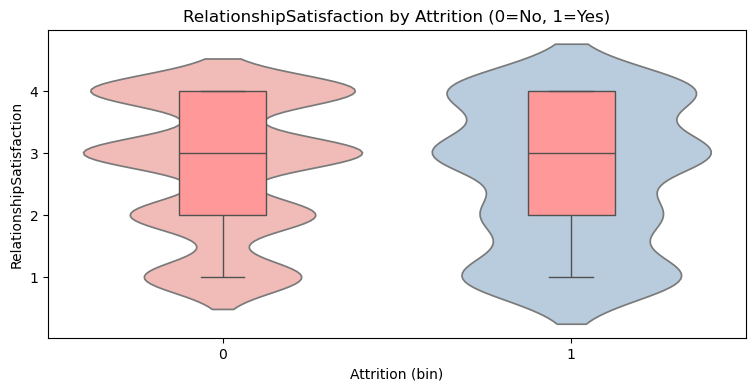

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


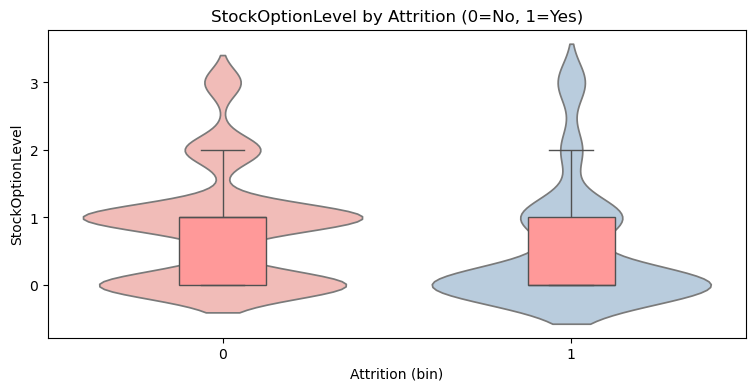

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


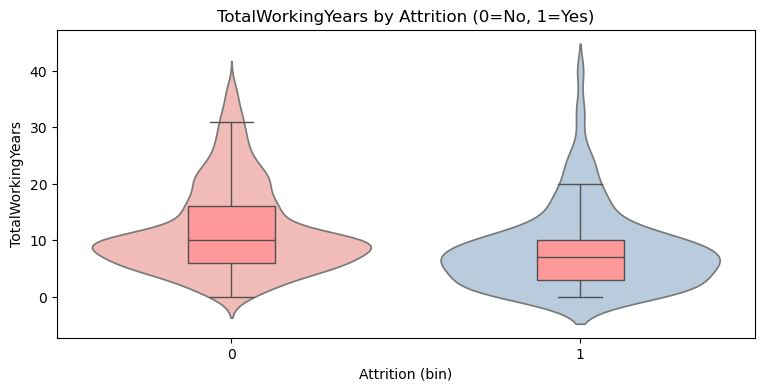

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


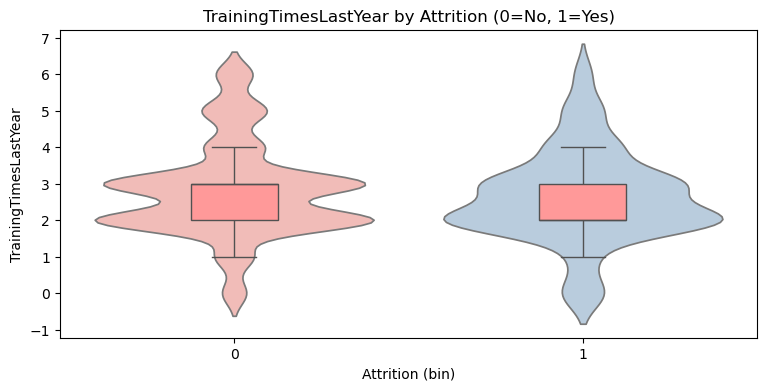

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


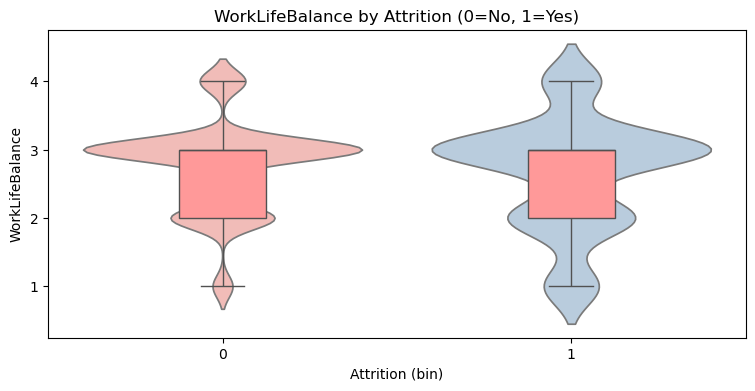

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


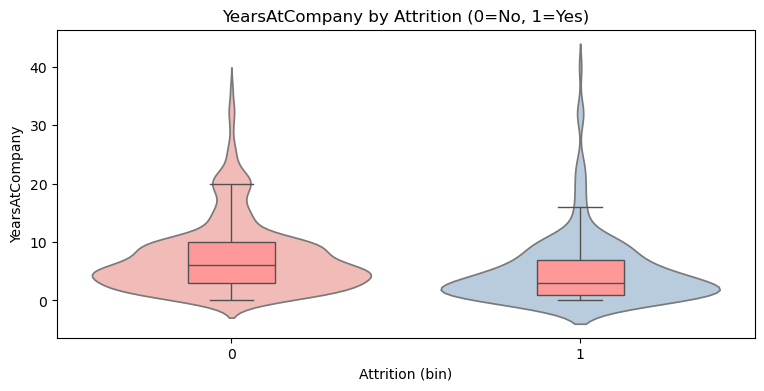

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


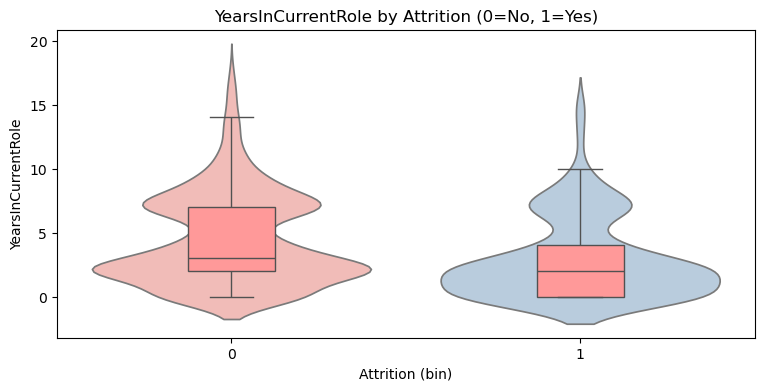

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


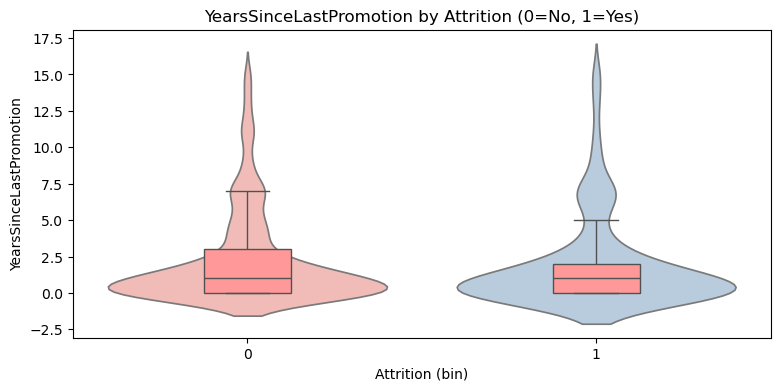

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1783767561.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


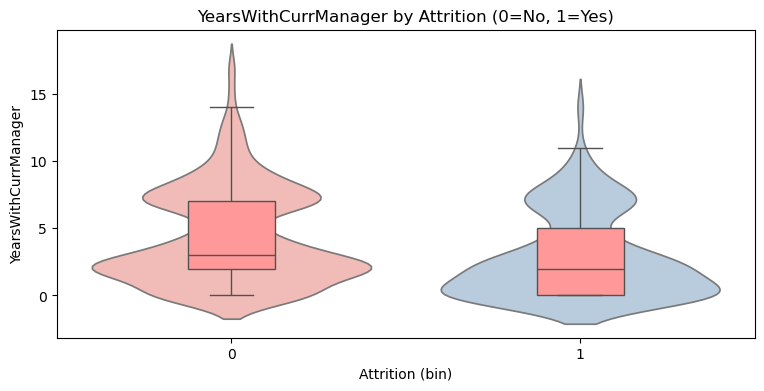

In [21]:
# ============================================
# BIVARIATE EDA — Attrition (PLOTS ONLY, COMBINED BAR + LINE, CORES MELHORADAS)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definir target
target = "Attrition"

# Criar coluna binária para attrition
df["_Attrition_bin"] = df[target].str.strip().str.lower().map(
    {"yes": 1, "sim": 1, "true": 1, "1": 1,
     "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0}
)

# Distribuição do target (paleta Set2)
tgt_vc = df[target].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=tgt_vc.index, y=tgt_vc.values, palette="Set2", ax=ax)
ax.set_title("Attrition distribution")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")

# Linha conectando os topos das barras
x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.plot(x_coords, y_coords, color="red", linestyle="--", marker="o")

plt.show()

# Categóricas vs Attrition
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c not in [target]]

for col in cat_cols:
    tmp = df[[col, "_Attrition_bin"]].dropna()
    grp = tmp.groupby(col)["_Attrition_bin"].agg(["mean", "count"]).reset_index()
    grp["attrition_pct"] = (grp["mean"] * 100).round(2)

    fig, ax = plt.subplots(figsize=(10, 4.5))
    # usar paleta diferente para cada gráfico
    sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)
    ax.set_title(f"Attrition (%) by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Attrition (%)")

    # Linha conectando os topos das barras
    x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.plot(x_coords, y_coords, color="black", linestyle="--", marker="o")

    # Rótulos nas barras
    for p, v in zip(ax.patches, grp["attrition_pct"]):
        ax.annotate(f"{v:.1f}%",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha="center", va="bottom", fontsize=9)

    plt.xticks(rotation=45, ha="right")
    plt.show()

# Numéricas vs Attrition (cores mais contrastantes)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != "_Attrition_bin"]

for col in num_cols:
    if df[col].dropna().nunique() < 2:
        continue
    fig, ax = plt.subplots(figsize=(9, 4))
    sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)
    sns.boxplot(data=df, x="_Attrition_bin", y=col, width=0.25,
                showcaps=True, boxprops={"facecolor": "#FF9999"},
                showfliers=False, ax=ax)
    ax.set_title(f"{col} by Attrition (0=No, 1=Yes)")
    ax.set_xlabel("Attrition (bin)")
    ax.set_ylabel(col)
    plt.show()

# LINHA REPRESENTANDO MÉDIA

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tgt_vc.index, y=tgt_vc.values, palette="Set2", ax=ax)


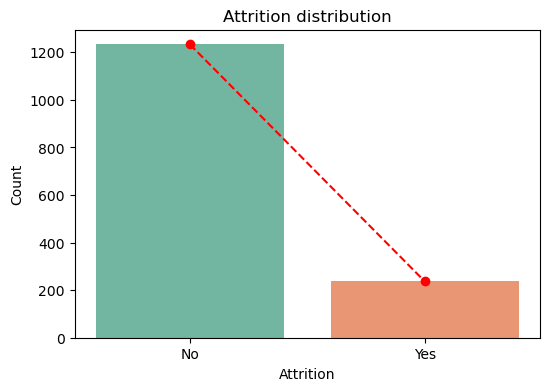

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


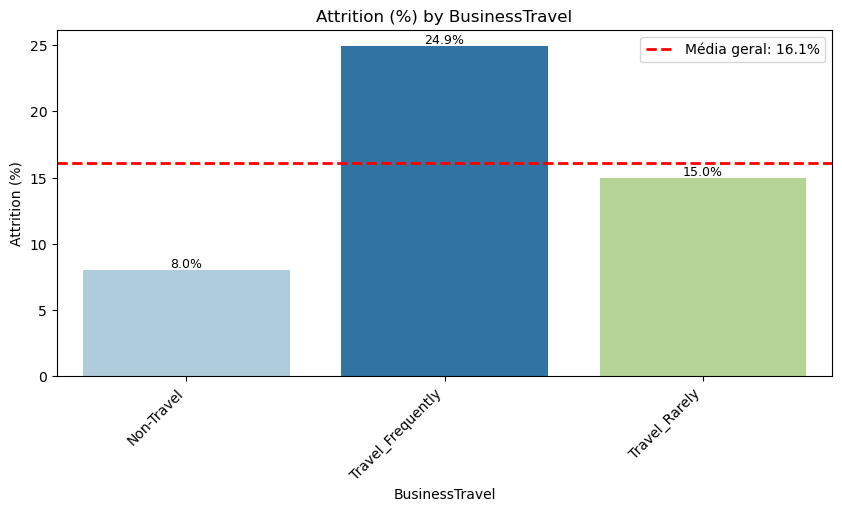

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


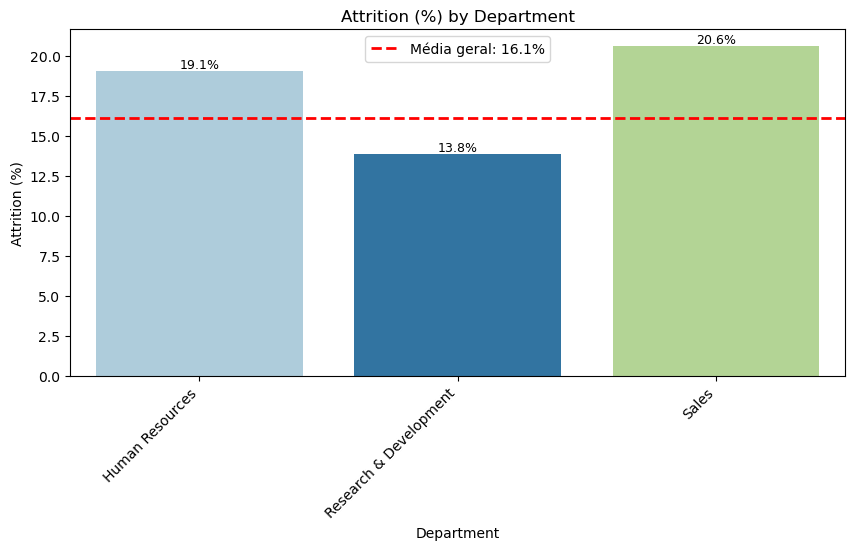

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


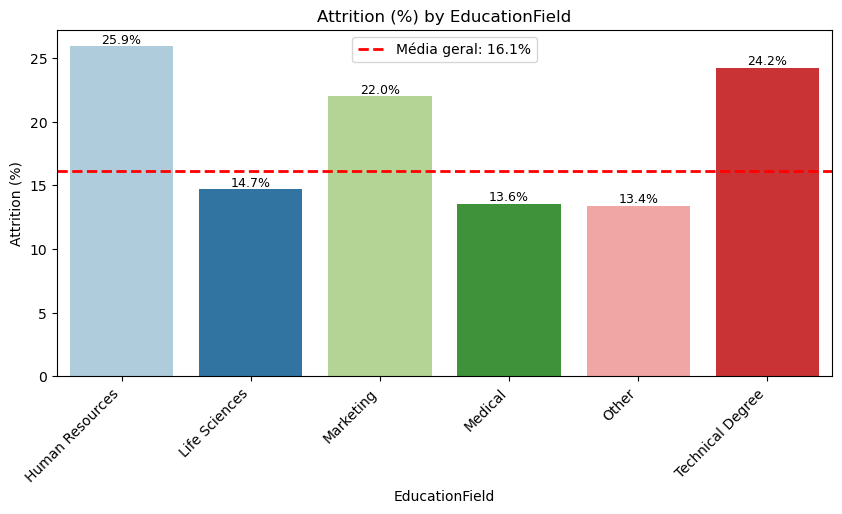

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


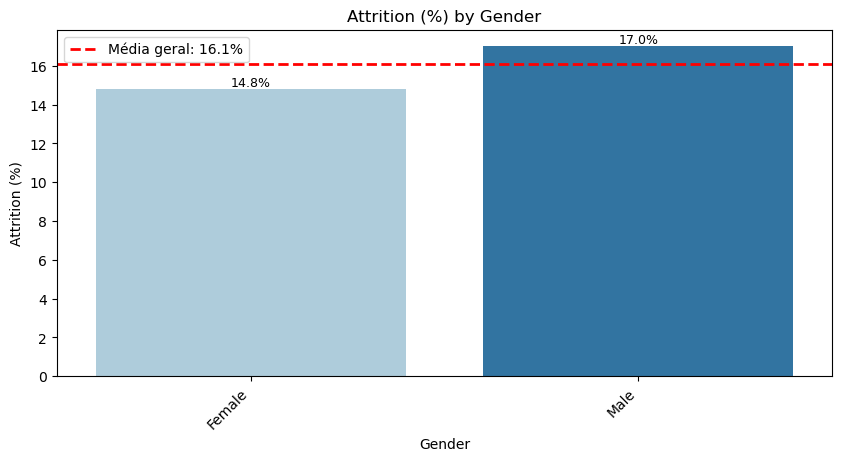

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


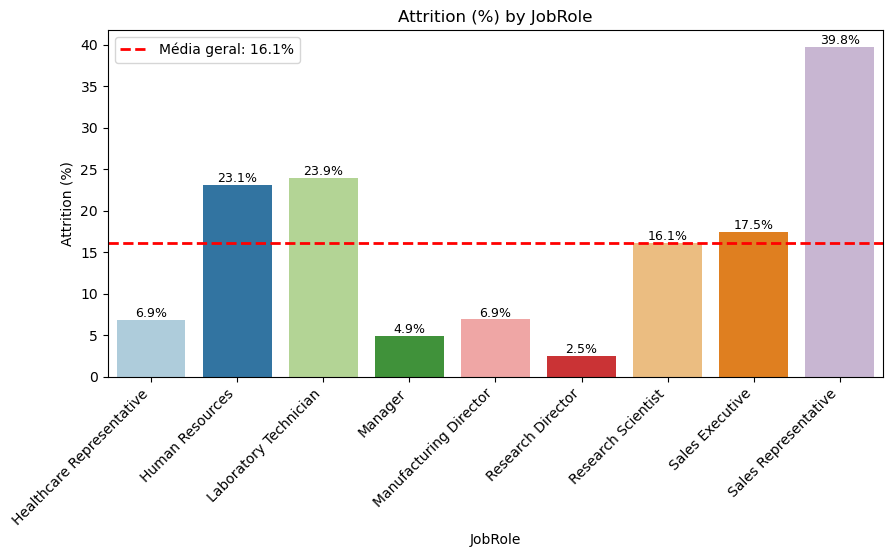

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


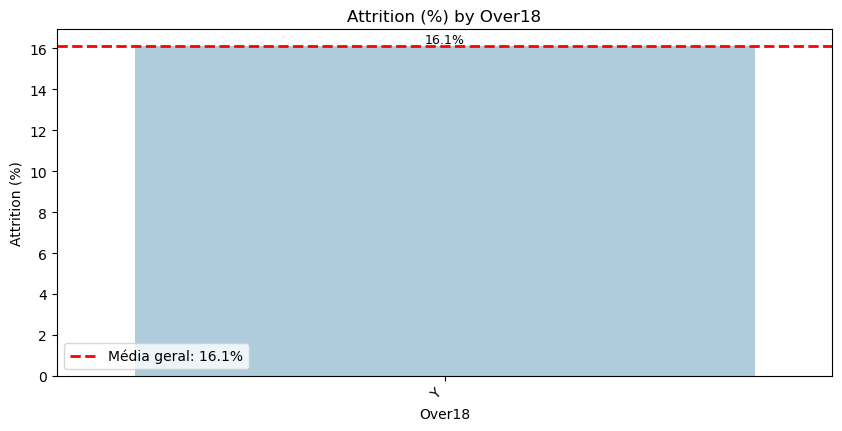

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)


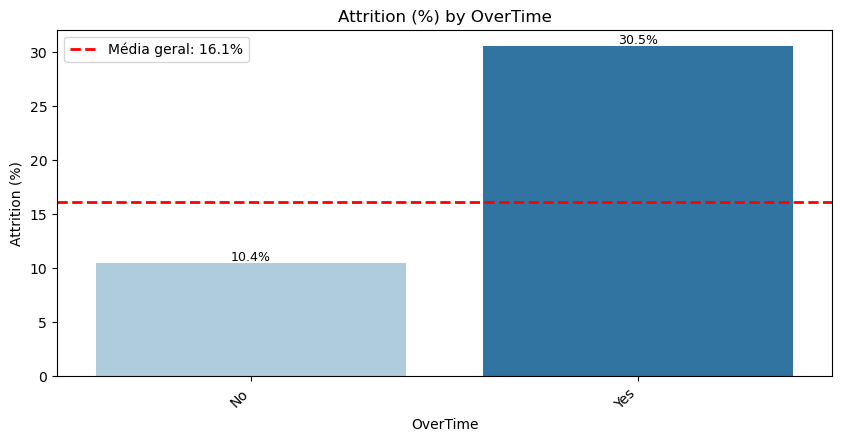

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


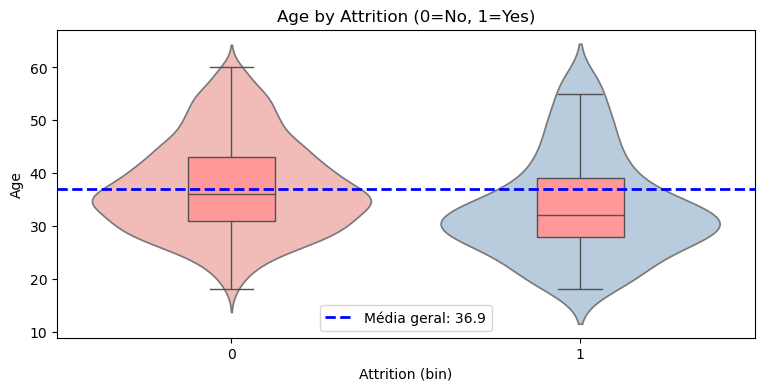

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


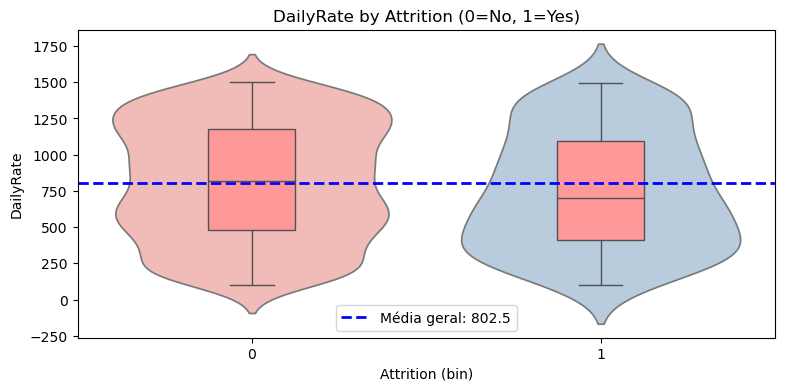

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


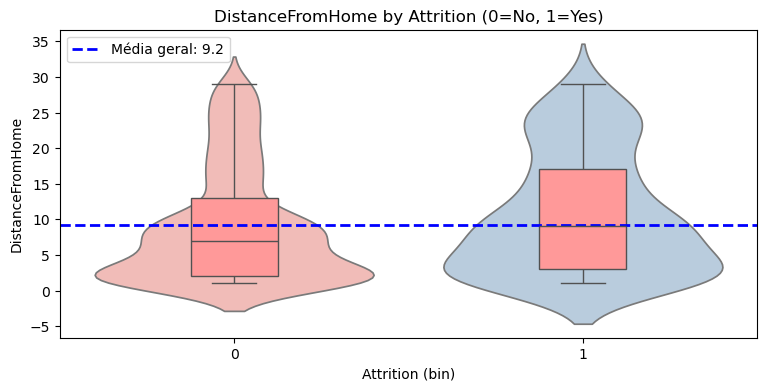

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


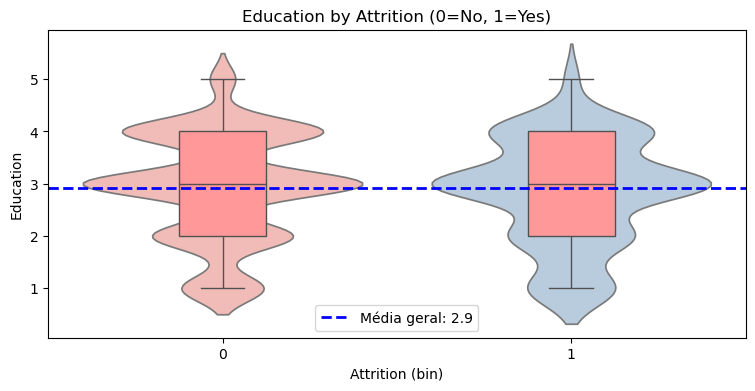

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


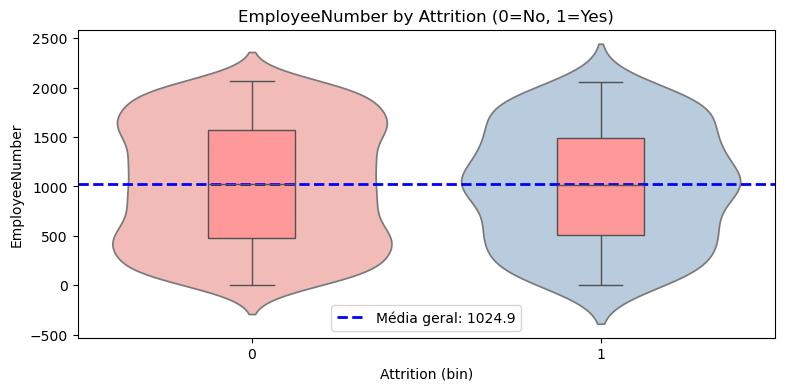

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


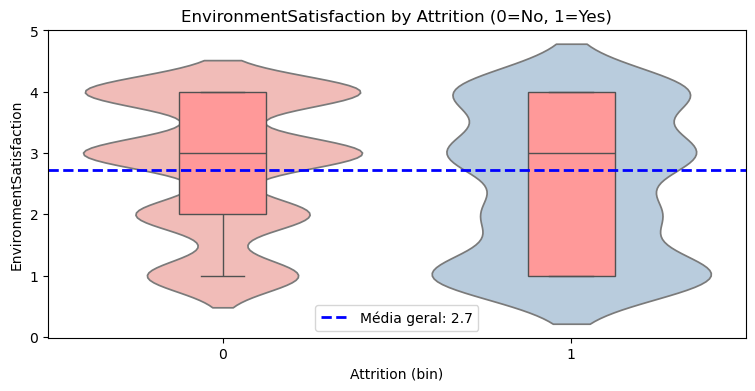

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


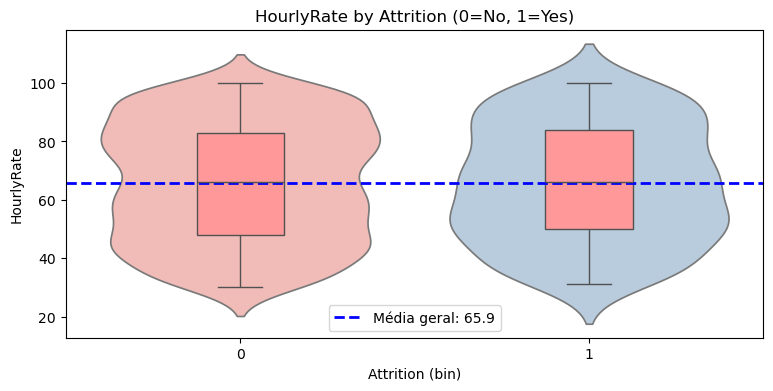

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


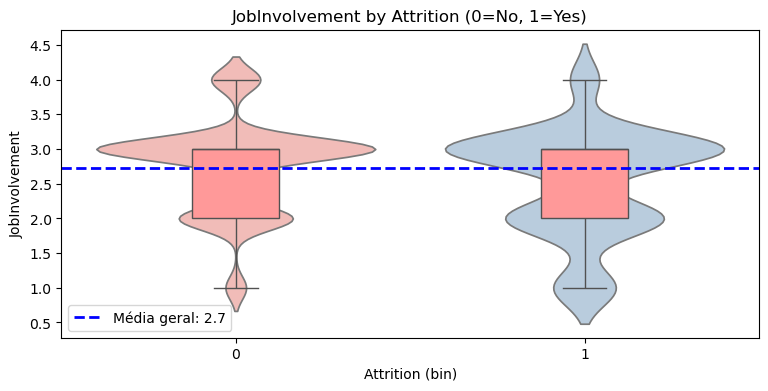

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


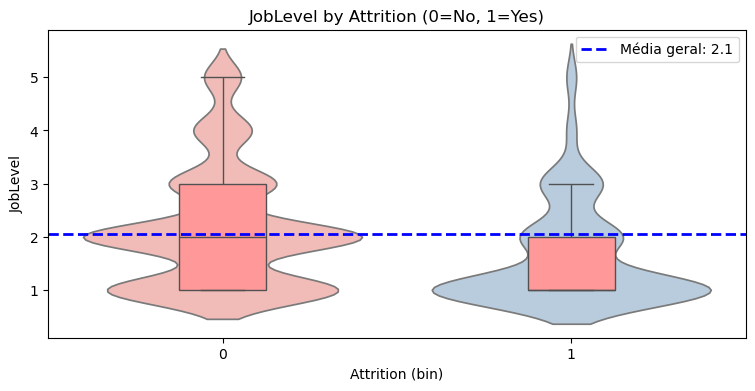

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


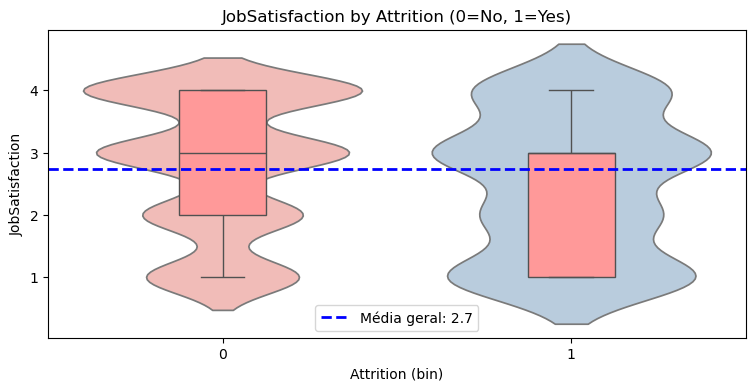

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


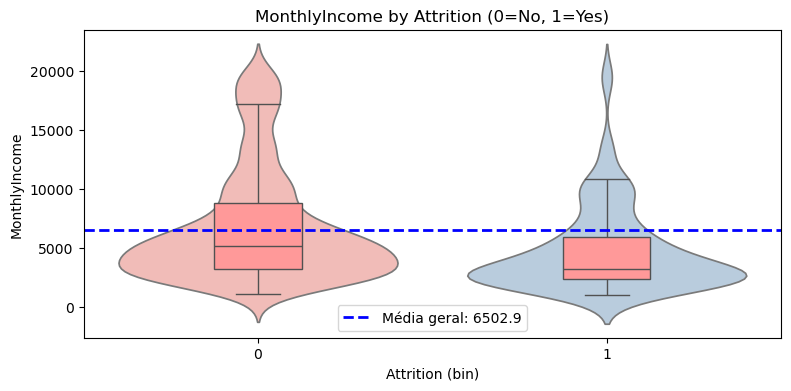

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


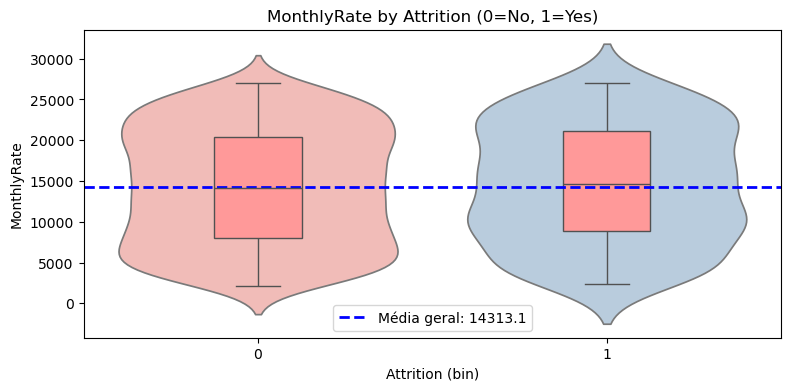

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


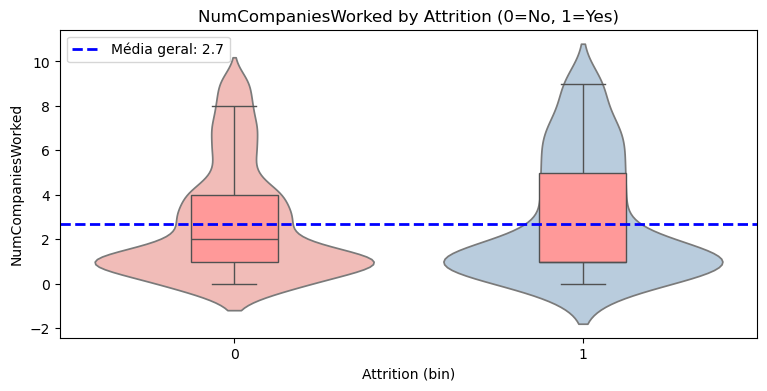

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


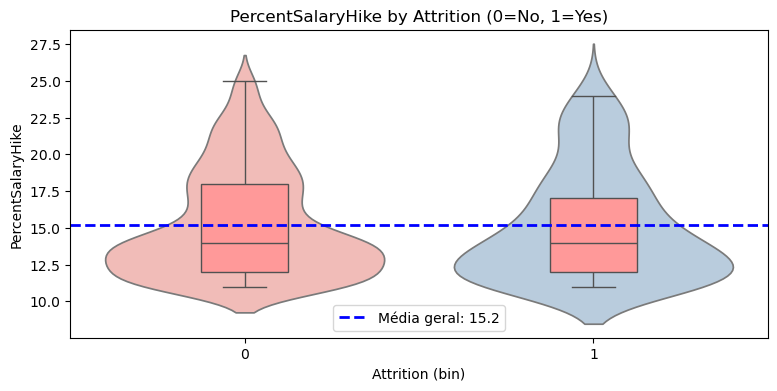

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


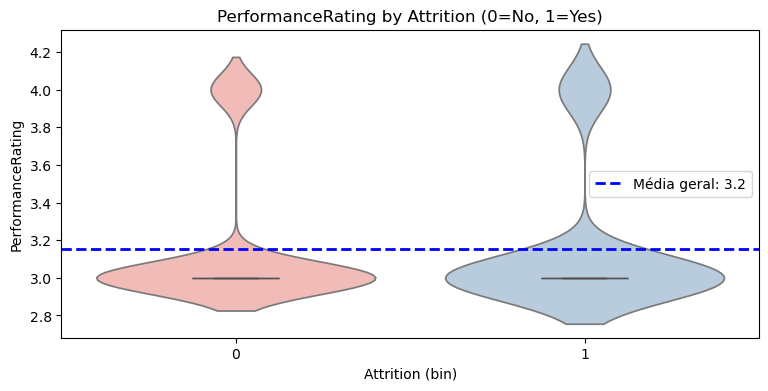

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


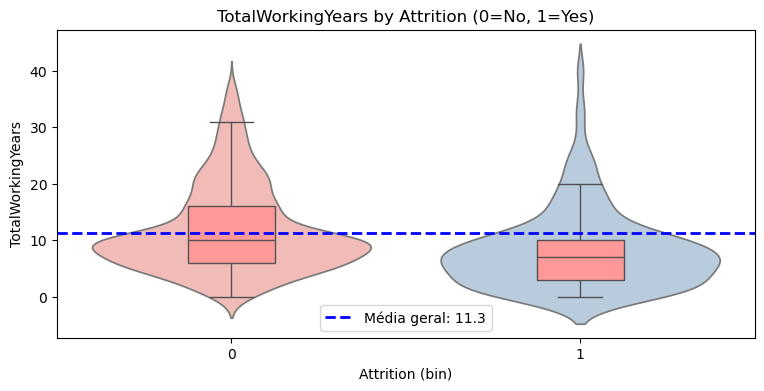

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


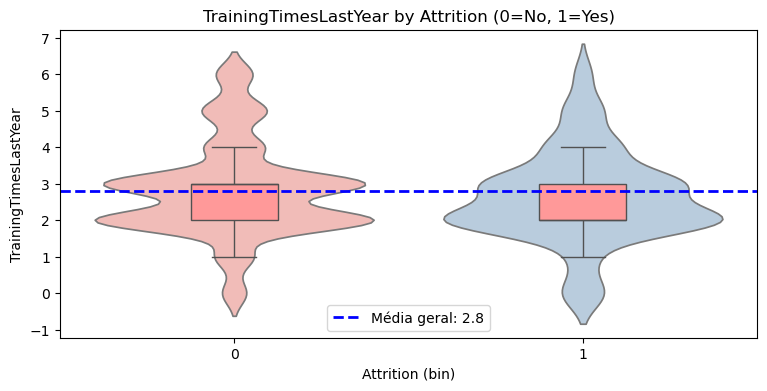

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


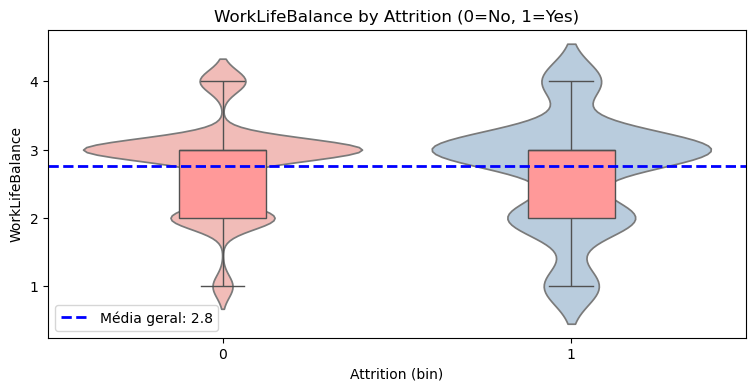

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


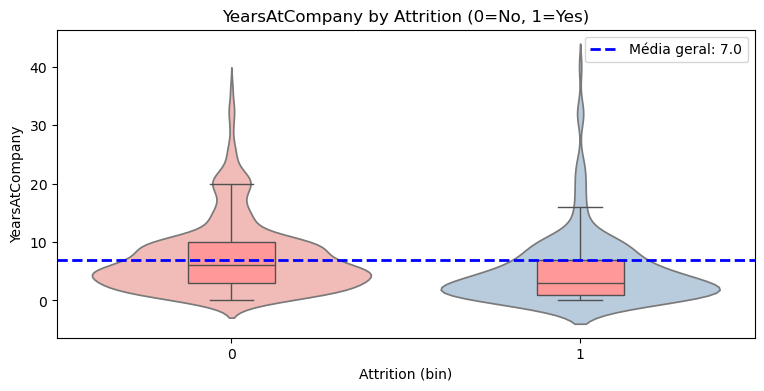

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


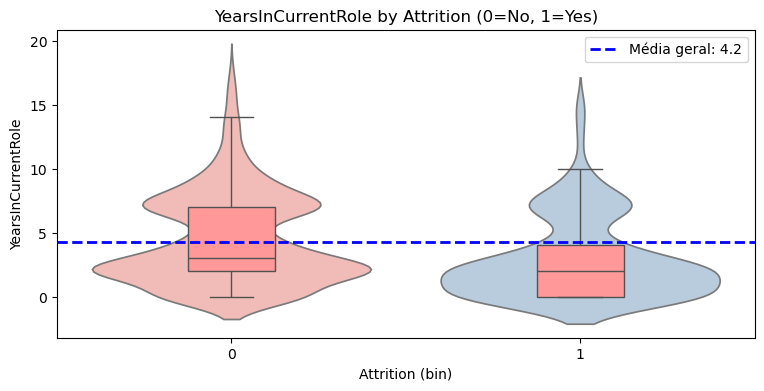

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


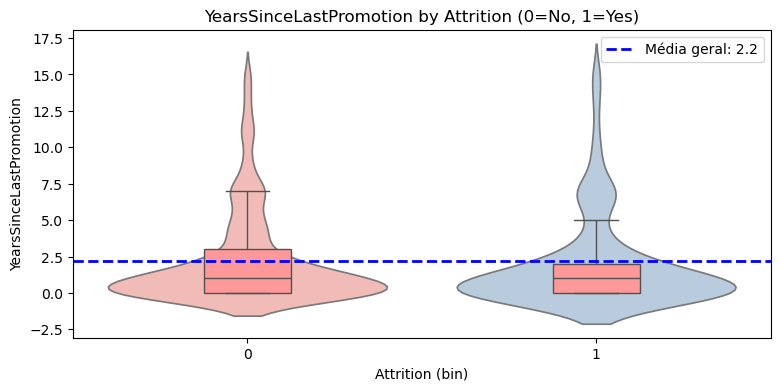

C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3076980257.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)


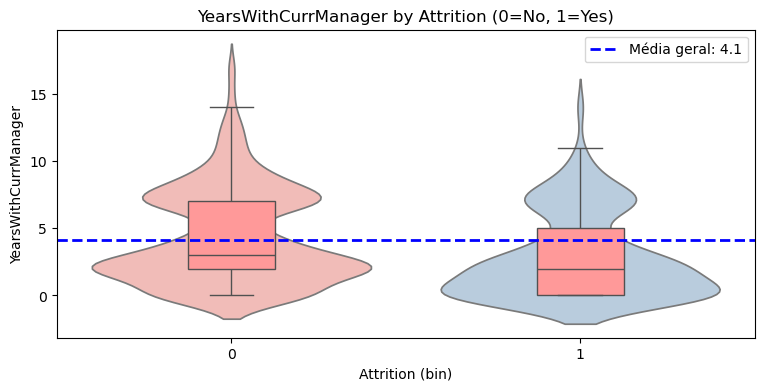

In [4]:
# ============================================
# BIVARIATE EDA — Attrition (PLOTS ONLY, COMBINED BAR + LINE, CORES MELHORADAS)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definir target
target = "Attrition"

# Criar coluna binária para attrition
df["_Attrition_bin"] = df[target].str.strip().str.lower().map(
    {"yes": 1, "sim": 1, "true": 1, "1": 1,
     "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0}
)

# Distribuição do target (paleta Set2)
tgt_vc = df[target].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=tgt_vc.index, y=tgt_vc.values, palette="Set2", ax=ax)
ax.set_title("Attrition distribution")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")

# Linha conectando os topos das barras
x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.plot(x_coords, y_coords, color="red", linestyle="--", marker="o")

plt.show()

# Categóricas vs Attrition
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c not in [target]]

for col in cat_cols:
    tmp = df[[col, "_Attrition_bin"]].dropna()
    grp = tmp.groupby(col)["_Attrition_bin"].agg(["mean", "count"]).reset_index()
    grp["attrition_pct"] = (grp["mean"] * 100).round(2)

    fig, ax = plt.subplots(figsize=(10, 4.5))
    sns.barplot(data=grp, x=col, y="attrition_pct", palette="Paired", ax=ax)
    ax.set_title(f"Attrition (%) by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Attrition (%)")

    # Linha horizontal representando a média geral de attrition
    overall_mean = df["_Attrition_bin"].mean() * 100
    ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
               label=f"Média geral: {overall_mean:.1f}%")
    ax.legend()

    # Rótulos nas barras
    for p, v in zip(ax.patches, grp["attrition_pct"]):
        ax.annotate(f"{v:.1f}%",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha="center", va="bottom", fontsize=9)

    plt.xticks(rotation=45, ha="right")
    plt.show()

# Numéricas vs Attrition (cores mais contrastantes)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != "_Attrition_bin"]

for col in num_cols:
    if df[col].dropna().nunique() < 2:
        continue
    fig, ax = plt.subplots(figsize=(9, 4))
    sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, palette="Pastel1", ax=ax)
    sns.boxplot(data=df, x="_Attrition_bin", y=col, width=0.25,
                showcaps=True, boxprops={"facecolor": "#FF9999"},
                showfliers=False, ax=ax)

    # Linha horizontal representando a média geral da variável
    overall_mean_num = df[col].mean()
    ax.axhline(overall_mean_num, color="blue", linestyle="--", linewidth=2,
               label=f"Média geral: {overall_mean_num:.1f}")
    ax.legend()

    ax.set_title(f"{col} by Attrition (0=No, 1=Yes)")
    ax.set_xlabel("Attrition (bin)")
    ax.set_ylabel(col)
    plt.show()

In [8]:
# ============================================
# MULTIVARIATE EDA — Spearman Only (Simplified, with One-Hot)
# ============================================

import pandas as pd
import numpy as np

# Garantir coluna binária para Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding das categóricas
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in ['Attrition']]
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Lista de variáveis numéricas (inclui dummies)
num_for_corr = [c for c in df_encoded.select_dtypes(include=[np.number]).columns]

# Correlação Spearman
corr = df_encoded[num_for_corr].corr(method='spearman')

print("\nSpearman correlation matrix:")
print(corr.round(3))

# Top 10 correlações absolutas com Attrition
if '_Attrition_bin' in corr.columns:
    tgt_corr = corr['_Attrition_bin'].drop(index='_Attrition_bin', errors='ignore')
    top10 = tgt_corr.abs().sort_values(ascending=False).head(10)
    print("\nTop 10 absolute Spearman correlations with Attrition:")
    print(top10)


Spearman correlation matrix:
                            Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000      0.007            -0.019      0.205   
DailyRate                 0.007      1.000            -0.003     -0.014   
DistanceFromHome         -0.019     -0.003             1.000      0.016   
Education                 0.205     -0.014             0.016      1.000   
EmployeeCount               NaN        NaN               NaN        NaN   
EmployeeNumber           -0.002     -0.052             0.039      0.043   
EnvironmentSatisfaction   0.010      0.019            -0.010     -0.028   
HourlyRate                0.029      0.024             0.020      0.014   
JobInvolvement            0.034      0.042             0.034      0.037   
JobLevel                  0.490      0.004             0.022      0.107   
JobSatisfaction          -0.005      0.028            -0.013     -0.005   
MonthlyIncome             0.472      0.016             0.003      0.12

In [10]:
print(top10)

TotalWorkingYears       0.199002
MonthlyIncome           0.198305
YearsAtCompany          0.190419
JobLevel                0.190370
YearsInCurrentRole      0.180623
YearsWithCurrManager    0.175355
StockOptionLevel        0.172296
Age                     0.171214
JobInvolvement          0.119496
JobSatisfaction         0.102948
Name: _Attrition_bin, dtype: float64


In [11]:
# ============================================
# Spearman Correlation — Top 10 Heatmap
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir coluna binária para Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding das categóricas
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in ['Attrition']]
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Lista de variáveis numéricas (inclui dummies)
num_for_corr = [c for c in df_encoded.select_dtypes(include=[np.number]).columns]

# Correlação Spearman
corr = df_encoded[num_for_corr].corr(method='spearman')

# Selecionar Top 10 correlações absolutas com Attrition
if '_Attrition_bin' in corr.columns:
    tgt_corr = corr['_Attrition_bin'].drop(index='_Attrition_bin', errors='ignore')
    top10 = tgt_corr.abs().sort_values(ascending=False).head(10).index

    # Submatriz apenas com target + top10
    sub_corr = corr.loc[top10.union(['_Attrition_bin']), top10.union(['_Attrition_bin'])]

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(sub_corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
    plt.title("Top 10 Spearman Correlations with Attrition")
    plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\706999855.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="Set2", ax=ax)


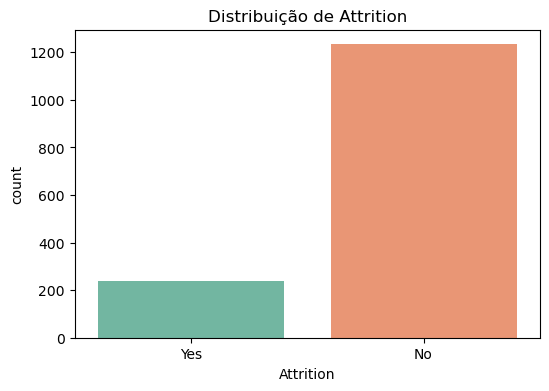

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\706999855.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Department", y="_Attrition_bin", data=df, palette="Blues", ax=ax)


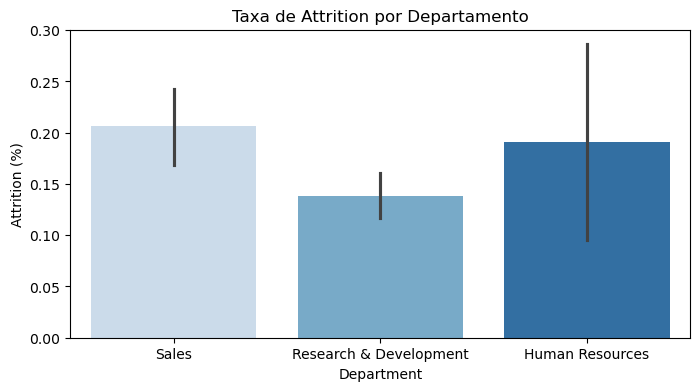

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\706999855.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="_Attrition_bin", data=df, palette="pastel", ax=ax)


C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\706999855.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="Set3", ax=ax)


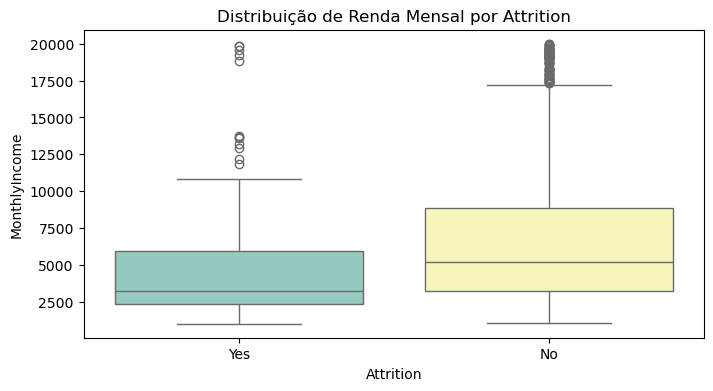

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\706999855.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="JobRole", y="_Attrition_bin", data=df, palette="coolwarm", ax=ax)


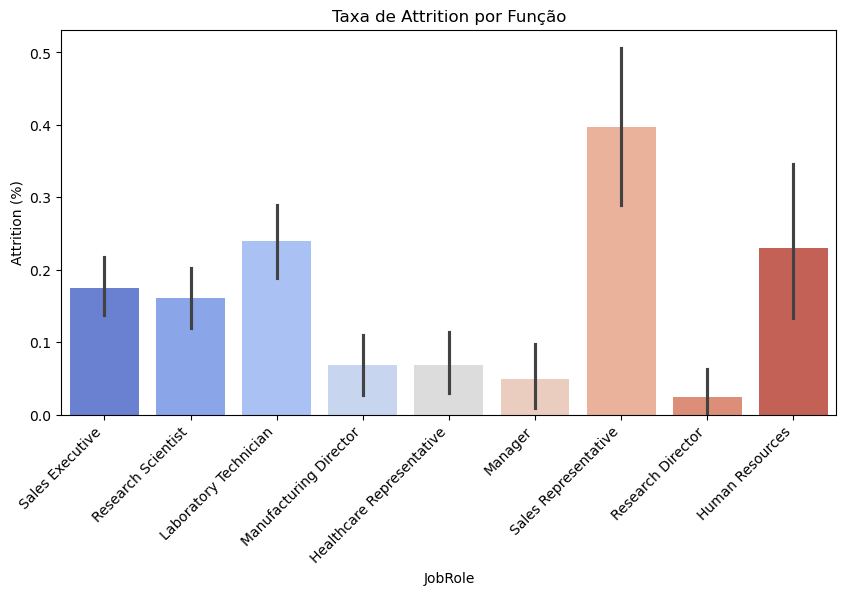

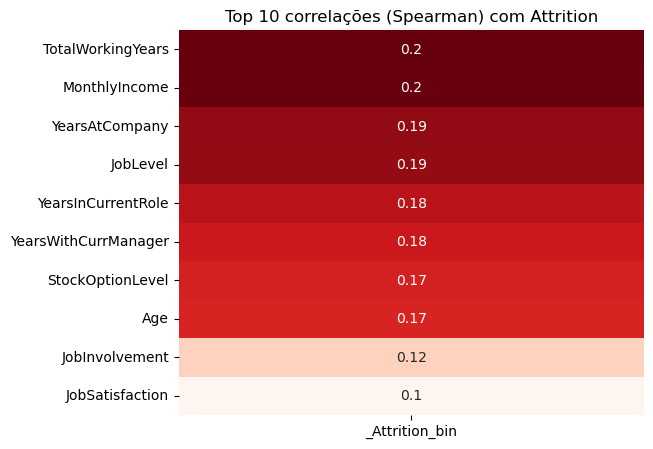

In [12]:
# ============================================
# Attrition-focused Plots (Synthetic & Informative)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Criar coluna binária para attrition
df["_Attrition_bin"] = df["Attrition"].str.strip().str.lower().map(
    {"yes": 1, "sim": 1, "true": 1, "1": 1,
     "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0}
)

# 1. Distribuição do target
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Attrition", data=df, palette="Set2", ax=ax)
ax.set_title("Distribuição de Attrition")
plt.show()

# 2. Attrition por Departamento
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x="Department", y="_Attrition_bin", data=df, palette="Blues", ax=ax)
ax.set_title("Taxa de Attrition por Departamento")
ax.set_ylabel("Attrition (%)")
plt.show()

# 3. Attrition por Gênero
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="Gender", y="_Attrition_bin", data=df, palette="pastel", ax=ax)
ax.set_title("Attrition por Gênero")
ax.set_ylabel("Attrition (%)")
plt.show()

# 4. Distribuição de Idade vs Attrition
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", bins=20, palette="Set1", ax=ax)
ax.set_title("Distribuição de Idade por Attrition")
plt.show()

# 5. Income vs Attrition (boxplot)
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="Set3", ax=ax)
ax.set_title("Distribuição de Renda Mensal por Attrition")
plt.show()

# 6. Attrition por JobRole (Top categorias)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="JobRole", y="_Attrition_bin", data=df, palette="coolwarm", ax=ax)
ax.set_title("Taxa de Attrition por Função")
ax.set_ylabel("Attrition (%)")
plt.xticks(rotation=45, ha="right")
plt.show()

# 7. Heatmap de correlação com Attrition
corr = df.select_dtypes(include=[np.number]).corr(method="spearman")
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(tgt_corr.to_frame(), annot=True, cmap="Reds", cbar=False, ax=ax)
ax.set_title("Top 10 correlações (Spearman) com Attrition")
plt.show()

Top 10 variáveis mais correlacionadas com Attrition:
TotalWorkingYears       0.199002
MonthlyIncome           0.198305
YearsAtCompany          0.190419
JobLevel                0.190370
YearsInCurrentRole      0.180623
YearsWithCurrManager    0.175355
StockOptionLevel        0.172296
Age                     0.171214
JobInvolvement          0.119496
JobSatisfaction         0.102948
Name: _Attrition_bin, dtype: float64


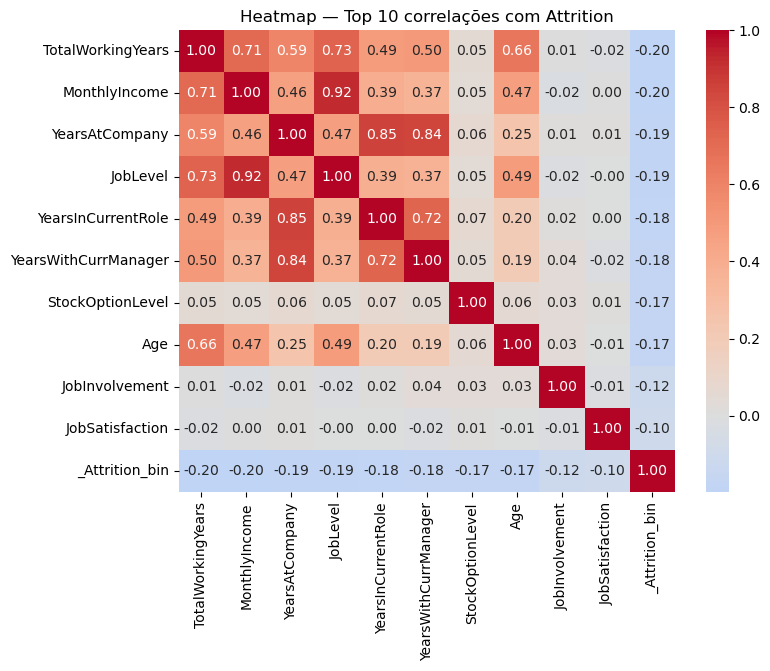

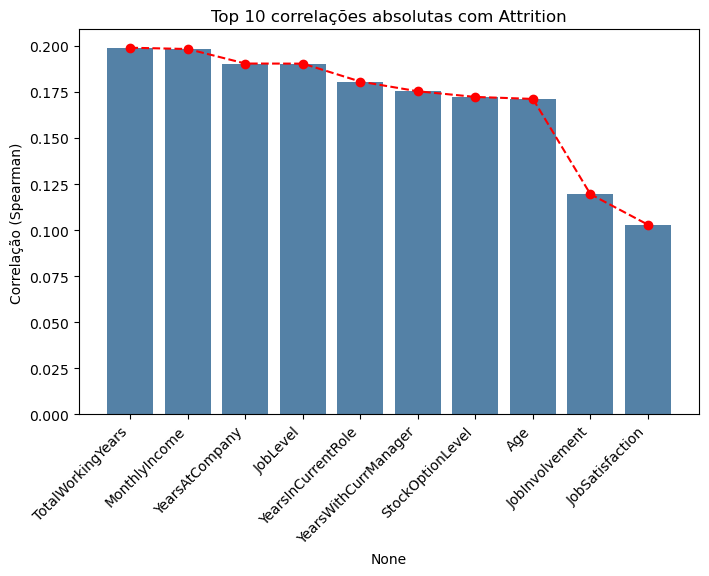

In [18]:
# ============================================
# Spearman simples + Top 10 Attrition Plots
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Garantir coluna binária para Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding das categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Selecionar apenas colunas numéricas
num_cols = df_encoded.select_dtypes(include=[np.number])

# Correlação Spearman
corr = num_cols.corr(method="spearman")

# Top 10 variáveis mais correlacionadas com Attrition
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
top10_vars = tgt_corr.index.tolist()

print("Top 10 variáveis mais correlacionadas com Attrition:")
print(tgt_corr)

# Heatmap das Top 10
plt.figure(figsize=(8,6))
sns.heatmap(corr.loc[top10_vars+["_Attrition_bin"], top10_vars+["_Attrition_bin"]],
            cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Heatmap — Top 10 correlações com Attrition")
plt.show()

# Barra + linha das correlações
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=tgt_corr.index, y=tgt_corr.values, color="steelblue", ax=ax)
x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.plot(x_coords, y_coords, color="red", linestyle="--", marker="o")
ax.set_title("Top 10 correlações absolutas com Attrition")
ax.set_ylabel("Correlação (Spearman)")
plt.xticks(rotation=45, ha="right")
plt.show()

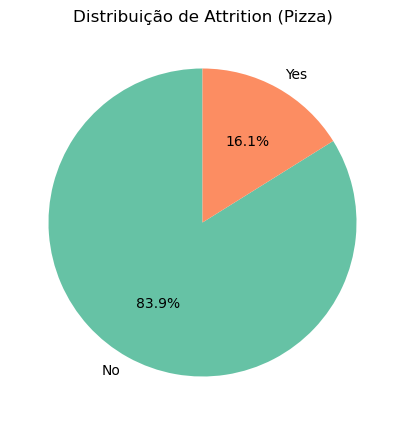

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\594986028.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="JobRole", x="_Attrition_bin", data=df, palette="Blues_r", ax=ax)


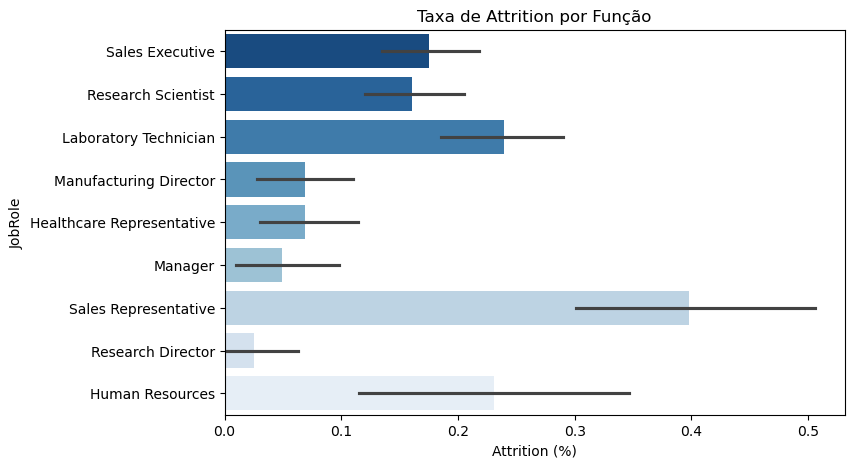

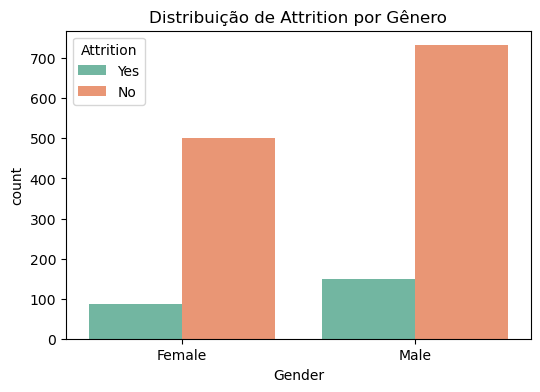

C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\594986028.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="OverTime", y="_Attrition_bin", data=df, palette="coolwarm", ax=ax)


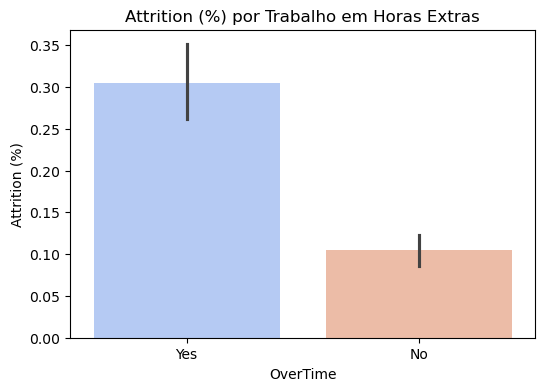

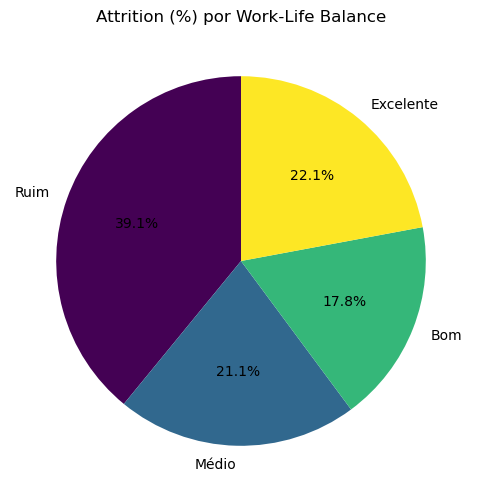

In [26]:
# ============================================
# Mais 5 Plots Bonitos e Sintéticos sobre Attrition
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pizza de Attrition (Yes vs No)
fig, ax = plt.subplots(figsize=(5,5))
df["Attrition"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, colors=["#66c2a5","#fc8d62"], ax=ax
)
ax.set_ylabel("")
ax.set_title("Distribuição de Attrition (Pizza)")
plt.show()

# 2. Barras horizontais — Attrition por JobRole
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(y="JobRole", x="_Attrition_bin", data=df, palette="Blues_r", ax=ax)
ax.set_title("Taxa de Attrition por Função")
ax.set_xlabel("Attrition (%)")
plt.show()

# 3. Barras empilhadas — Attrition por Gender
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Gender", hue="Attrition", data=df, palette="Set2", ax=ax)
ax.set_title("Distribuição de Attrition por Gênero")
plt.show()

# 4. Barras — Attrition por OverTime
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="OverTime", y="_Attrition_bin", data=df, palette="coolwarm", ax=ax)
ax.set_title("Attrition (%) por Trabalho em Horas Extras")
ax.set_ylabel("Attrition (%)")
plt.show()

# ============================================
# Pizza — Attrition por WorkLifeBalance (com legenda ajustada)
# ============================================

# Mapear os valores para legendas mais claras
wlb_labels = {1: "Ruim", 2: "Médio", 3: "Bom", 4: "Excelente"}

# Criar série com médias de attrition por WorkLifeBalance
wlb_series = df.groupby("WorkLifeBalance")["_Attrition_bin"].mean()

# Renomear índices com os labels
wlb_series.index = wlb_series.index.map(wlb_labels)

# Plotar pizza
fig, ax = plt.subplots(figsize=(6,6))
wlb_series.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="viridis", ax=ax
)
ax.set_ylabel("")
ax.set_title("Attrition (%) por Work-Life Balance")
plt.show()

Melhor fold (Accuracy):
Fold        4.000000
Accuracy    0.836735
F1          0.272727
Name: 3, dtype: float64

Melhor fold (F1):
Fold        3.000000
Accuracy    0.833333
F1          0.309859
Name: 2, dtype: float64


C:\Users\mathe\AppData\Local\Temp\ipykernel_4460\1960170813.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette=["steelblue","seagreen"], ax=ax)


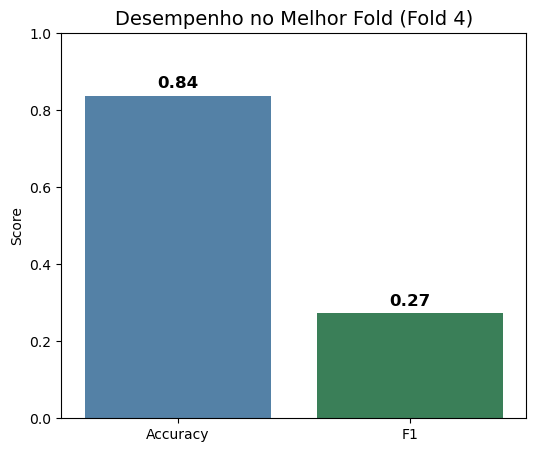

In [25]:
# ============================================
# Foco no Melhor Fold — Random Forest
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Identificar o melhor fold (pela acurácia ou F1)
best_fold_acc = results_df.loc[results_df["Accuracy"].idxmax()]
best_fold_f1  = results_df.loc[results_df["F1"].idxmax()]

print("Melhor fold (Accuracy):")
print(best_fold_acc)
print("\nMelhor fold (F1):")
print(best_fold_f1)

# Plot comparativo — barras únicas
fig, ax = plt.subplots(figsize=(6,5))
metrics = ["Accuracy", "F1"]
values = [best_fold_acc["Accuracy"], best_fold_acc["F1"]]

sns.barplot(x=metrics, y=values, palette=["steelblue","seagreen"], ax=ax)

# Adicionar labels
for i, v in enumerate(values):
    ax.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

ax.set_ylim(0,1)
ax.set_title(f"Desempenho no Melhor Fold (Fold {int(best_fold_acc['Fold'])})", fontsize=14)
ax.set_ylabel("Score")
plt.show()